# What are the most demanded skills for the top most popular entry level data roles?

#### Methodology
1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Filter for United States Jobs
df_US = df[df['job_country'] == 'United States'].copy()

# Explode Skills
df_skills = df_US.explode('job_skills').copy()

# Count Skills
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name='skill_count').copy()
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [4]:
# Get the list of unique job titles
job_titles = df_skills_count['job_title_short'].unique().tolist()

# Filter for Non-Senior Job Titles
job_titles = [title for title in job_titles if 'Senior' not in title]
job_titles = sorted(job_titles)
job_titles

['Business Analyst',
 'Cloud Engineer',
 'Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Software Engineer']

# Subplot of Top 5 Skills for Each Entry Level Role

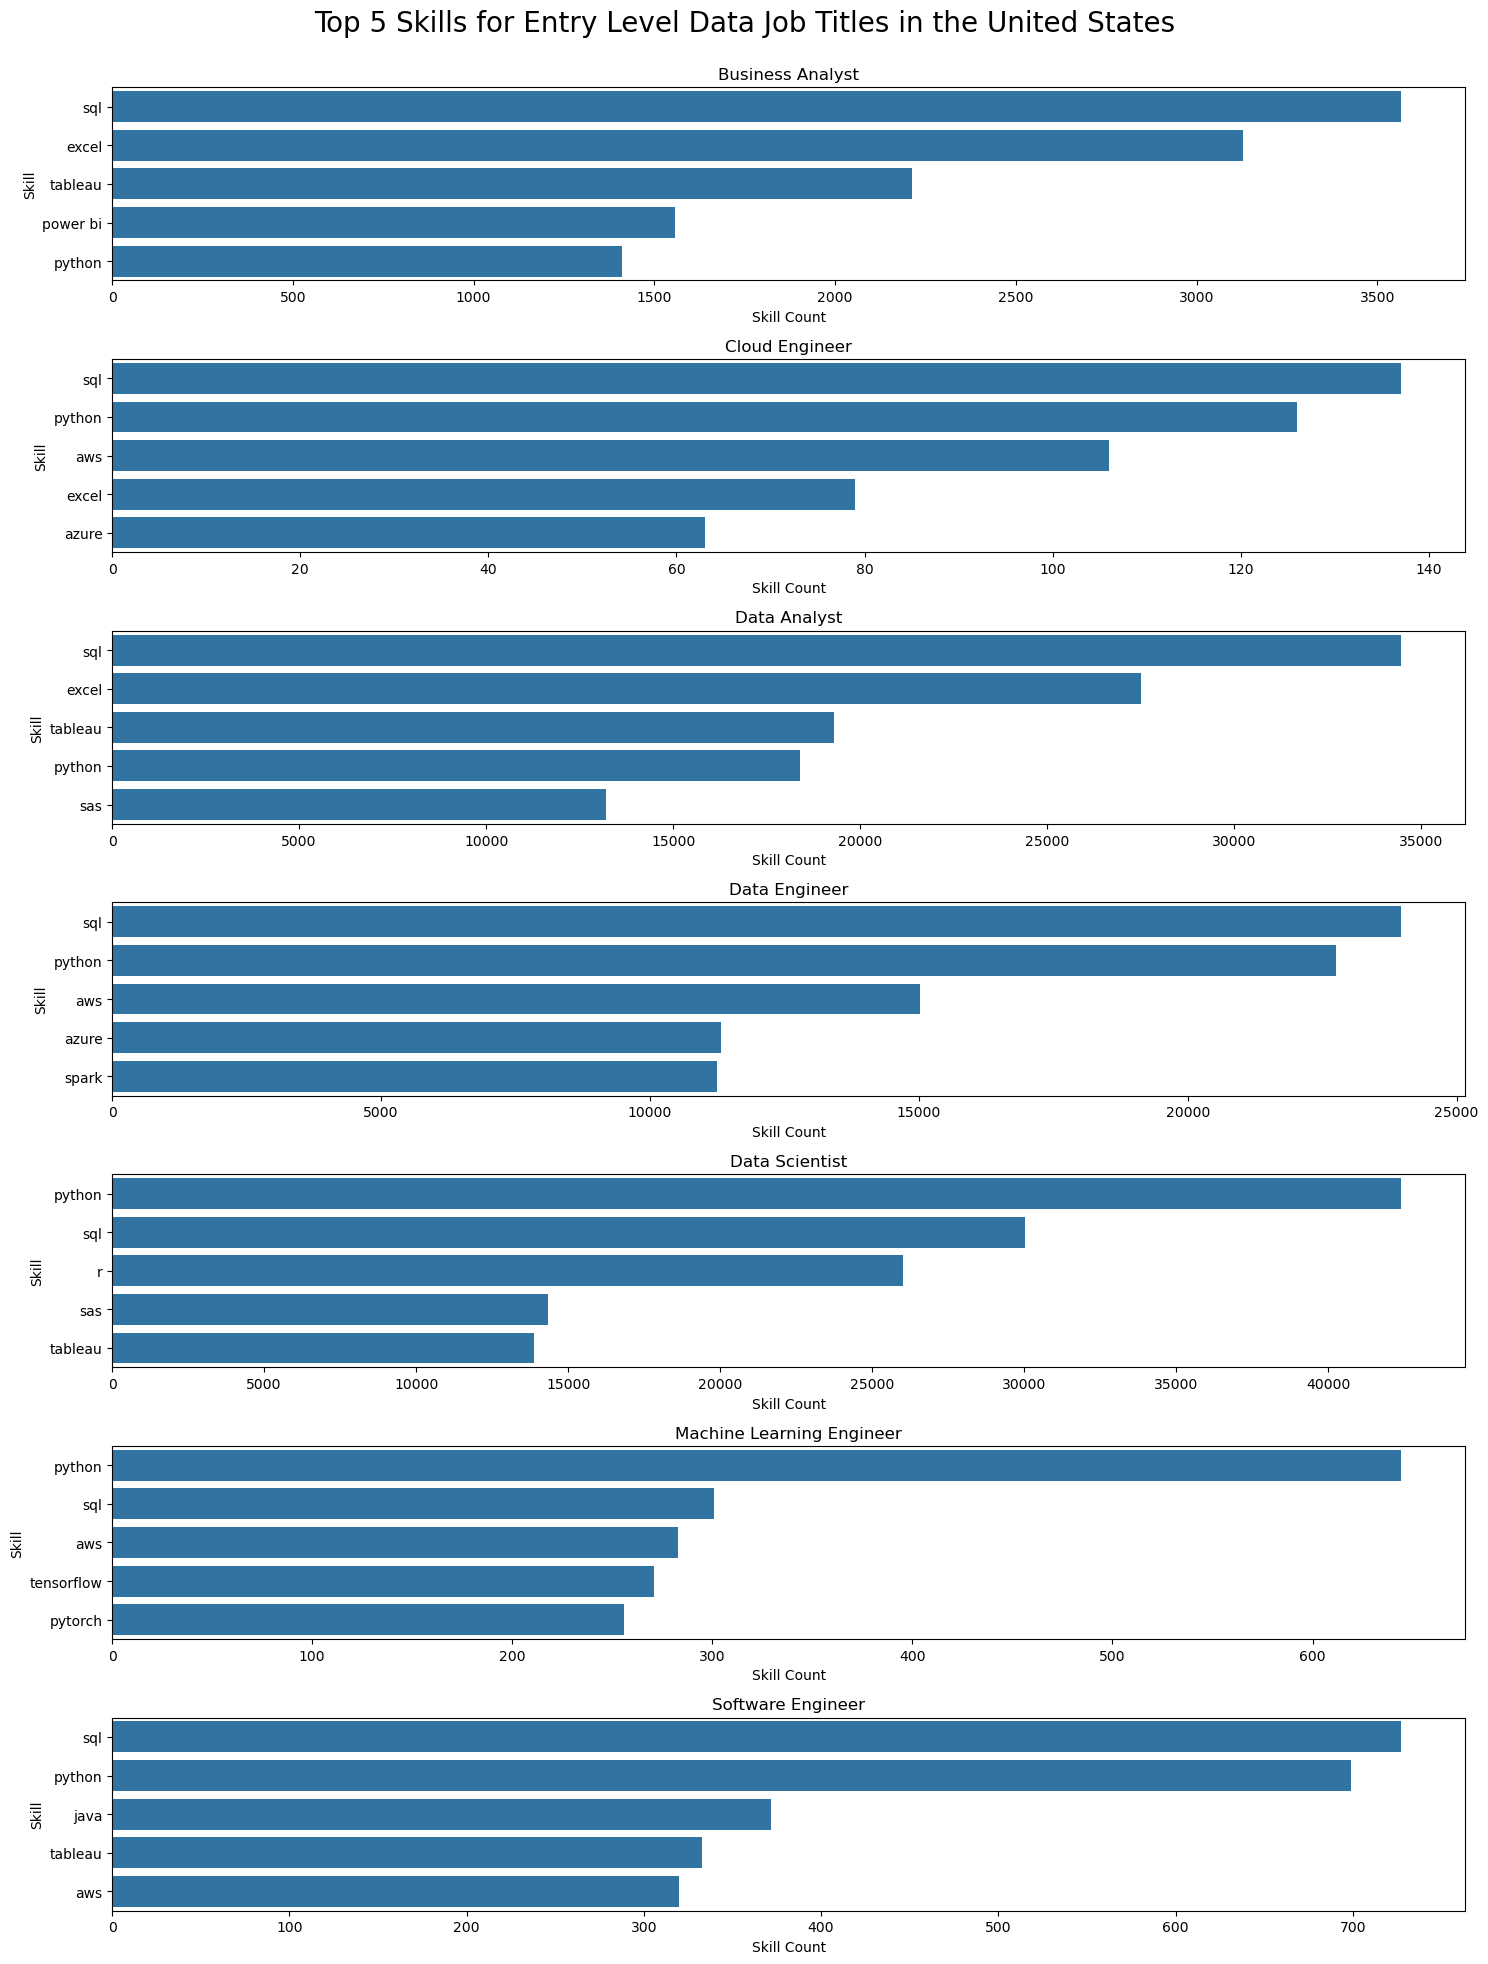

In [5]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(15, 20))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5).copy()
    sns.barplot(x='skill_count', y='job_skills', data=df_plot, ax=ax[i])
    ax[i].set_title(job_title)
    ax[i].set_xlabel('Skill Count')
    ax[i].set_ylabel('Skill')

plt.suptitle('Top 5 Skills for Entry Level Data Job Titles in the United States', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [6]:
# Get the total number of jobs for each job title
df_US_job_total = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [7]:
# Merge the skill count and job total dataframes
df_skills_perc = pd.merge(df_skills_count, df_US_job_total, how='left', on='job_title_short')

# Calculate the percentage of jobs that require each skill
df_skills_perc['skill_perc'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


# Subplot of Percentages of Top 5 Skills for Entry Level Data Roles

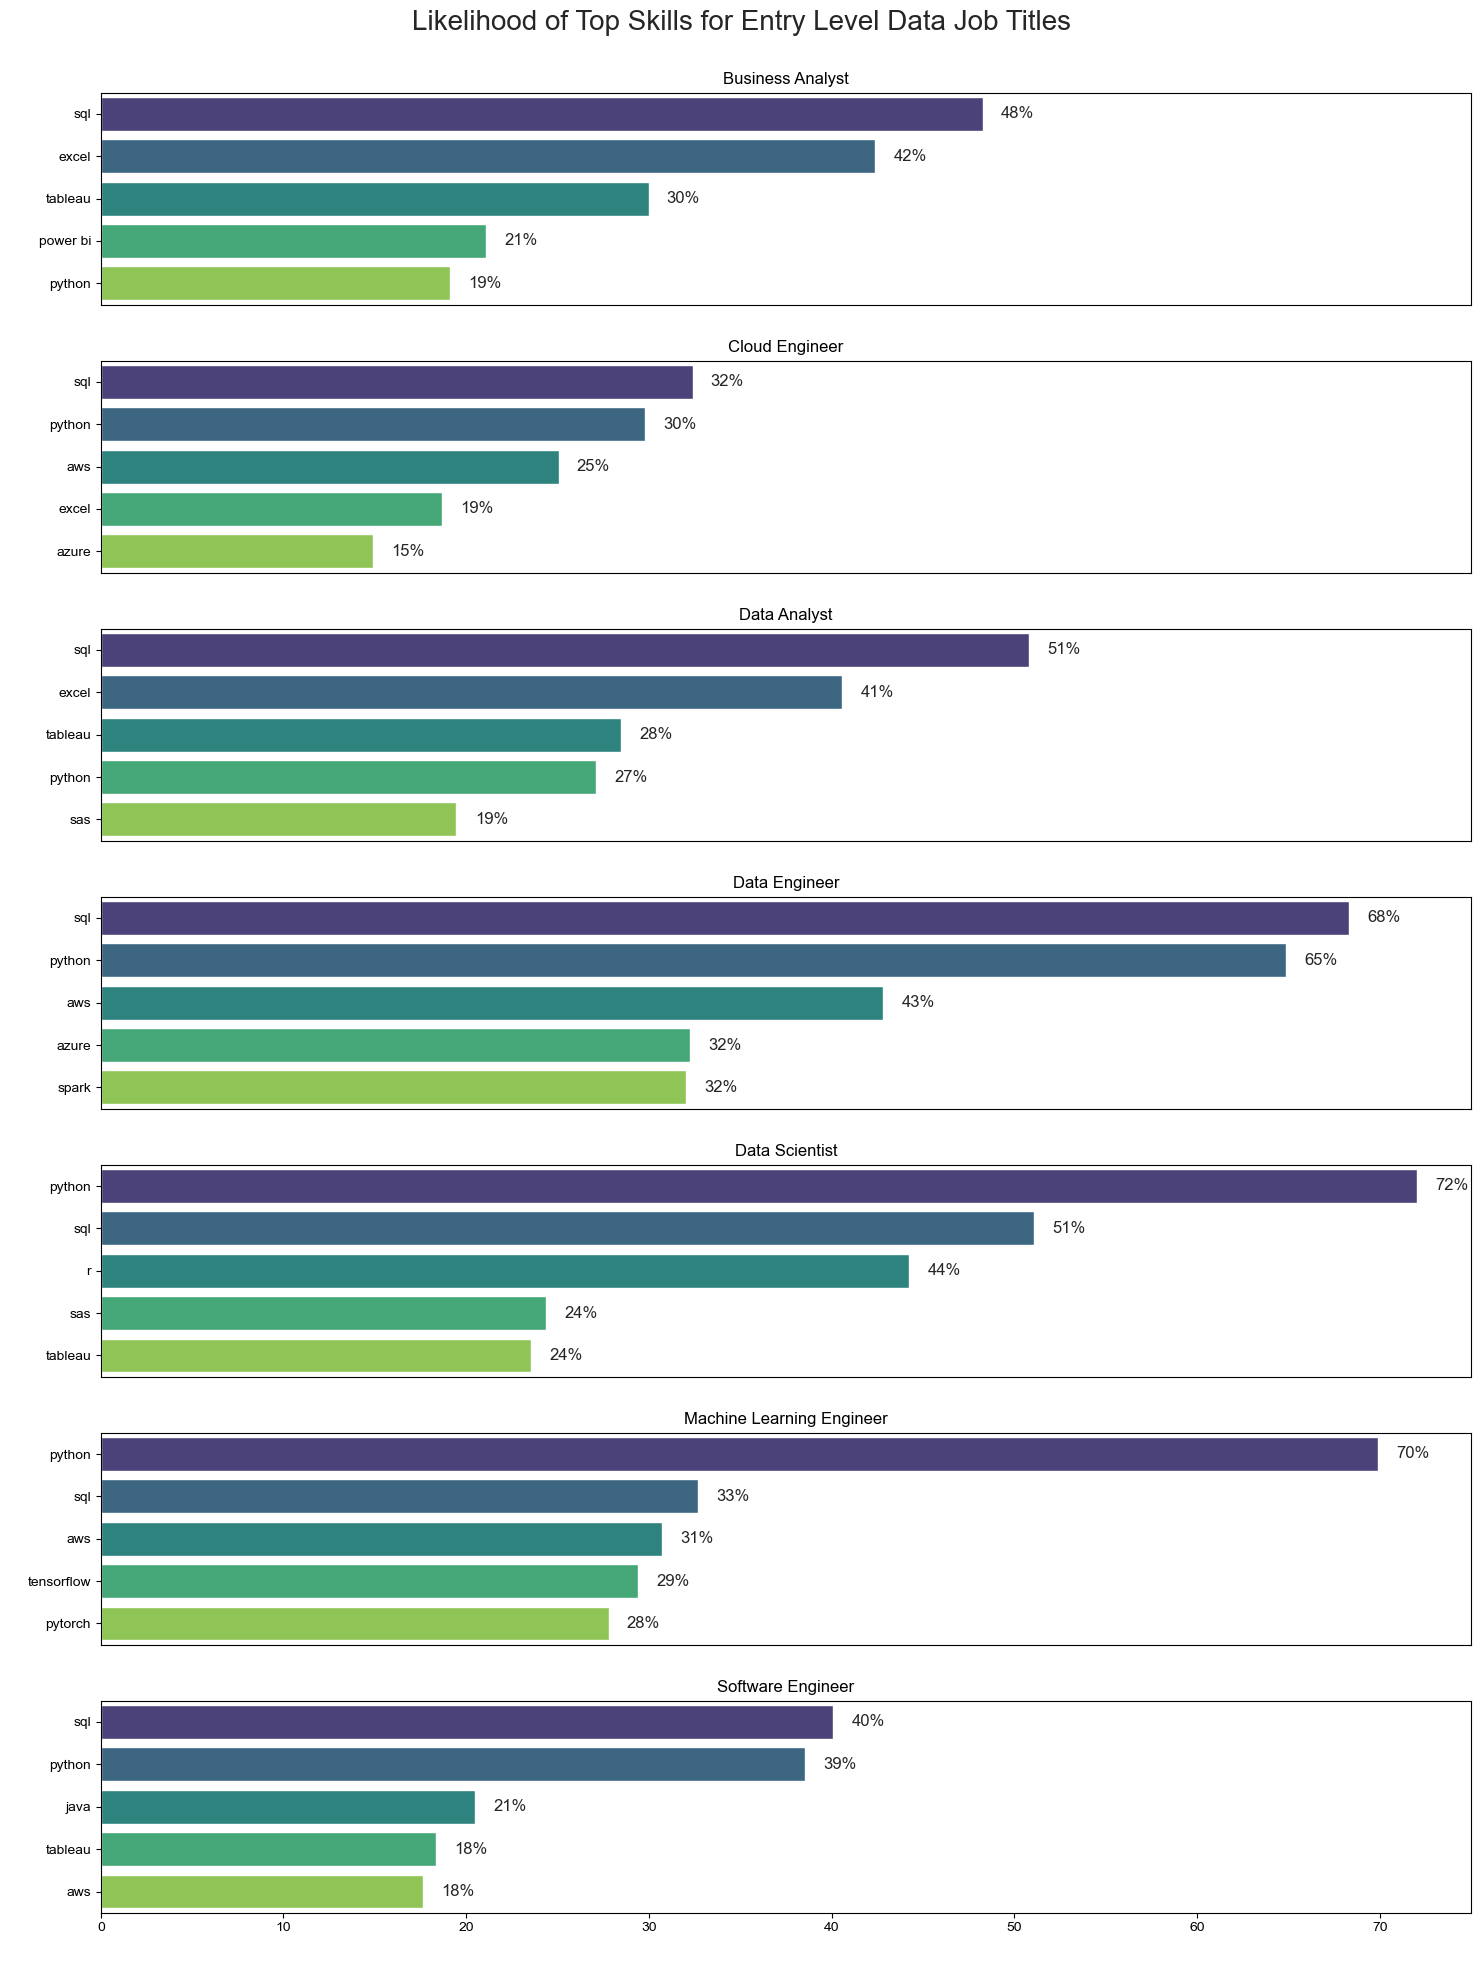

In [8]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(15, 20))
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5).copy()
    sns.barplot(x='skill_perc', y='job_skills', data=df_plot, ax=ax[i], hue='job_skills', palette='viridis')
    ax[i].set_title(job_title)
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_xlim(0, 75)

    for n, value in enumerate(df_plot['skill_perc']):
        ax[i].text(value + 1, n, f'{value:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

plt.suptitle('Likelihood of Top Skills for Entry Level Data Job Titles', fontsize=20, ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()